<a href="https://colab.research.google.com/github/Armin-Abdollahi/Attention-Mechanism/blob/main/Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The **Soft Attention mechanism** is a type of attention that allows the model to focus on different parts of the input for each step of the output.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SoftAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SoftAttention, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.attention = nn.Linear(self.input_dim + self.hidden_dim, 1)

    def forward(self, encoder_outputs, hidden):
        # Concatenate the hidden state with each encoder output
        hidden = hidden.repeat(encoder_outputs.size(0), 1, 1).transpose(0, 1)
        encoder_outputs = encoder_outputs.transpose(0, 1)  # [batch_size, seq_len, features]
        merged = torch.cat((hidden, encoder_outputs), 2)

        # Apply the attention layer to get the attention scores
        attention_scores = self.attention(merged).squeeze(2)
        attention_scores = F.softmax(attention_scores, dim=1)

        # Multiply the scores by the encoder outputs to get the weighted sum
        context_vector = torch.bmm(attention_scores.unsqueeze(1), encoder_outputs).squeeze(1)
        return context_vector, attention_scores

# Example usage:
# Define the dimensions
input_dim = 128  # Size of the encoder output feature vector
hidden_dim = 256  # Size of the decoder hidden state

# Create the SoftAttention layer
attention_layer = SoftAttention(input_dim, hidden_dim)

# Assume some random encoder outputs and hidden state
encoder_outputs = torch.randn(10, 32, input_dim)  # [seq_len, batch_size, features]
hidden = torch.randn(32, hidden_dim)  # [batch_size, hidden_dim]

# Get the context vector and attention scores
context_vector, attention_scores = attention_layer(encoder_outputs, hidden)

Implements a simple Soft Attention mechanism on the CIFAR-10 dataset using Keras


This code defines a simple CNN with a Soft Attention mechanism that applies a learned mask to the feature maps of the convolutional layer, allowing the network to focus on the most relevant parts of the image for classification.

170498071/170498071 [==============================] - 7s 0us/step
Epoch 1/10
782/782 [==============================] - 20s 13ms/step - loss: 1.4037 - accuracy: 0.4983 - val_loss: 1.0908 - val_accuracy: 0.6165
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.0117 - accuracy: 0.6457 - val_loss: 0.9708 - val_accuracy: 0.6581
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8494 - accuracy: 0.7023 - val_loss: 0.9298 - val_accuracy: 0.6684
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7267 - accuracy: 0.7473 - val_loss: 0.8321 - val_accuracy: 0.7118
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.6086 - accuracy: 0.7878 - val_loss: 0.8187 - val_accuracy: 0.7247
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4923 - accuracy: 0.8281 - val_loss: 0.8658 - val_accuracy: 0.7246
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 0.385

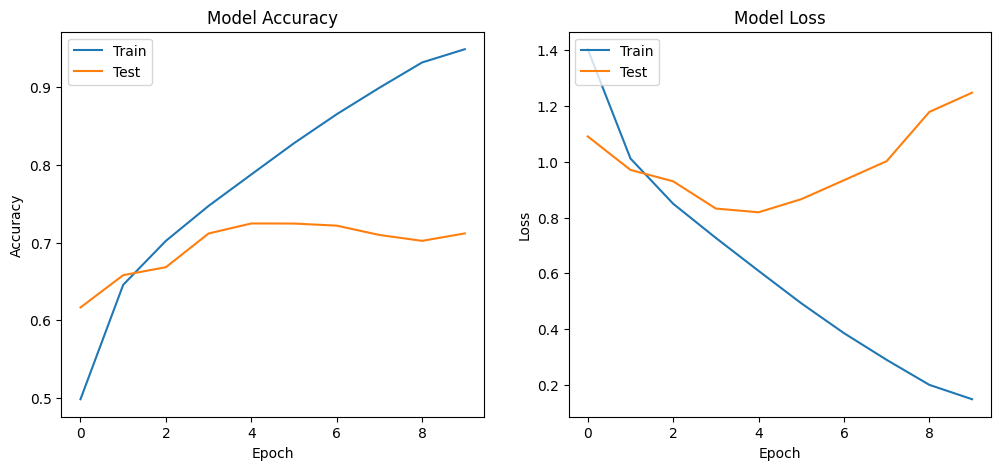

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Activation, multiply
from keras.utils import to_categorical
from keras.callbacks import History

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Soft Attention module
def soft_attention(activation_layer):
    attention = Conv2D(1, (1, 1), padding='same')(activation_layer)
    attention = Activation('sigmoid')(attention)
    return multiply([activation_layer, attention])

# Model architecture
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = soft_attention(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_img, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = History()
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[history])

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

#### **Hard attention mechanisms** selectively focus on certain parts of the input data while ignoring the rest, which is different from soft attention that considers all parts with varying weights.

Implementing Hard Attention on the CIFAR-10 dataset involves several steps, including defining the attention mechanism, integrating it with a neural network model, training the model, and plotting the results.

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.9251 - accuracy: 0.2951 - val_loss: 1.7938 - val_accuracy: 0.3571
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7632 - accuracy: 0.3682 - val_loss: 1.7635 - val_accuracy: 0.3604
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7046 - accuracy: 0.3891 - val_loss: 1.7509 - val_accuracy: 0.3741
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6699 - accuracy: 0.4037 - val_loss: 1.6812 - val_accuracy: 0.3956
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6412 - accuracy: 0.4172 - val_loss: 1.6659 - val_accuracy: 0.3999
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6153 - accuracy: 0.4272 - val_loss: 1.6559 - val_accuracy: 0.4070
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5983 - accuracy: 0.4322 - val_loss: 1.6382 - val_accuracy

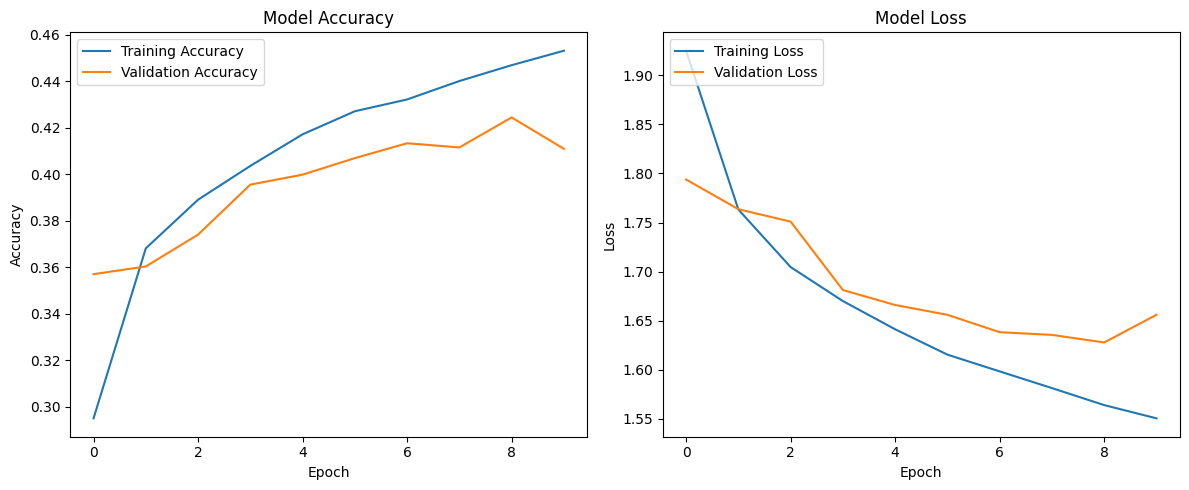

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Lambda
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define the Hard Attention mechanism
def hard_attention(x):
    # Implementing hard attention mechanism
    # Create an attention mask that focuses on a 10x10 pixel region in the center of the image
    shape = tf.shape(x)
    center = (shape[1]//2, shape[2]//2)
    attention_size = (10, 10)  # Define the size of the window to focus on

    # Create a mask with ones in the region of interest and zeros elsewhere
    mask = tf.pad(
        tensor=tf.ones((attention_size[0], attention_size[1], shape[3])),
        paddings=[
            [center[0]-attention_size[0]//2, shape[1]-center[0]-attention_size[0]//2],
            [center[1]-attention_size[1]//2, shape[2]-center[1]-attention_size[1]//2],
            [0, 0]
        ],
        mode='CONSTANT',
        constant_values=0
    )
    mask = tf.expand_dims(mask, 0)  # Add batch dimension
    mask = tf.tile(mask, [shape[0], 1, 1, 1])  # Repeat the mask for each image in the batch
    return x * mask

# Build the model with the Hard Attention layer
input_layer = Input(shape=(32, 32, 3))
attention_layer = Lambda(hard_attention)(input_layer)
conv_layer = Conv2D(32, (3, 3), activation='relu')(attention_layer)
flattened_layer = Flatten()(conv_layer)
output_layer = Dense(10, activation='softmax')(flattened_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Code uses PyTorch to implement a simple Self Attention mechanism on the CIFAR-10 dataset.

The self-attention mechanism is integrated into a CNN for image classification

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.388213495540497, Accuracy: 0.4961
Epoch 2, Loss: 1.0650326768912928, Accuracy: 0.62666
Epoch 3, Loss: 0.9610405740378153, Accuracy: 0.66268
Epoch 4, Loss: 0.8865628090813337, Accuracy: 0.69166
Epoch 5, Loss: 0.8351323302749478, Accuracy: 0.71132
Epoch 6, Loss: 0.7982977725889372, Accuracy: 0.72274
Epoch 7, Loss: 0.7684148010390494, Accuracy: 0.73324
Epoch 8, Loss: 0.7428642534996237, Accuracy: 0.7422
Epoch 9, Loss: 0.7191464038532408, Accuracy: 0.75082
Epoch 10, Loss: 0.7026269469419708, Accuracy: 0.75578


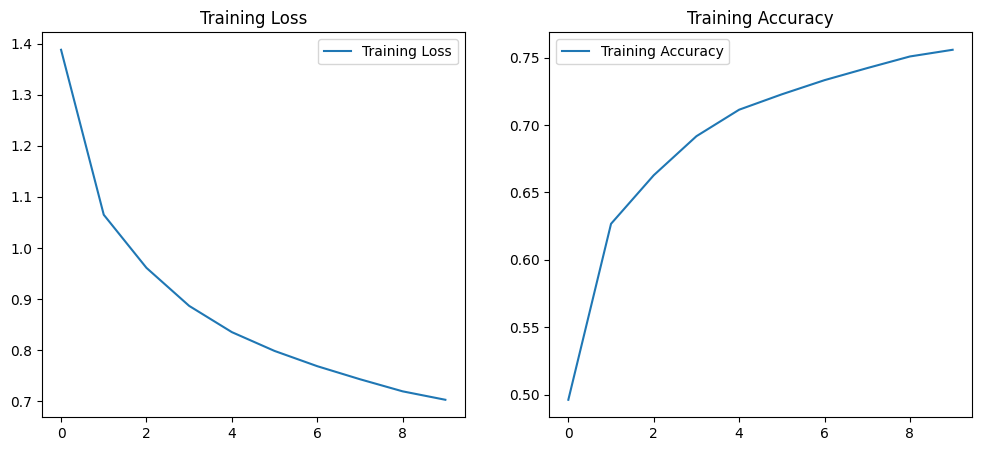

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Self-Attention Model
class SelfAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(SelfAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Self-attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SelfAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

Multi-Head Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.388708739024599, Accuracy: 0.49996
Epoch 2, Loss: 1.0593447393316138, Accuracy: 0.62832
Epoch 3, Loss: 0.9591418784445204, Accuracy: 0.66386
Epoch 4, Loss: 0.8955630900152504, Accuracy: 0.68798
Epoch 5, Loss: 0.8430965941427918, Accuracy: 0.7085
Epoch 6, Loss: 0.8101945812135096, Accuracy: 0.72082
Epoch 7, Loss: 0.7788937692065983, Accuracy: 0.72982
Epoch 8, Loss: 0.7500917858937207, Accuracy: 0.73962
Epoch 9, Loss: 0.7272411613436915, Accuracy: 0.74718
Epoch 10, Loss: 0.7067726449588375, Accuracy: 0.75192


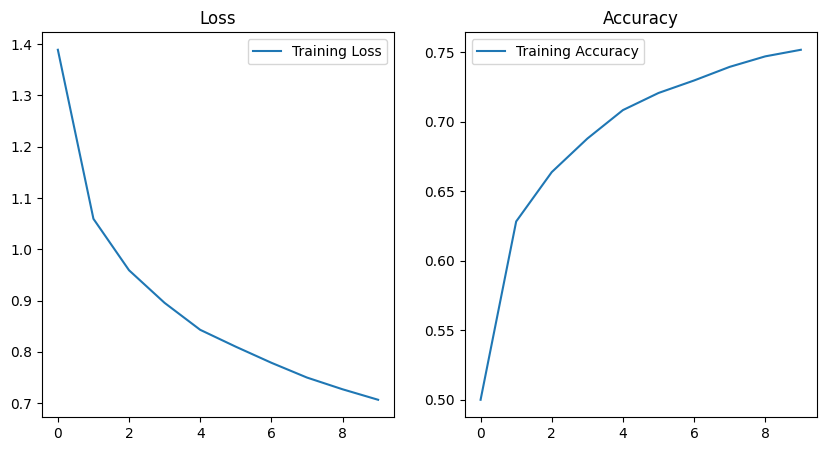

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# Define the Multi-Head Attention Model
class MultiHeadAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(MultiHeadAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Multi-head attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MultiHeadAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
def plot_graphs(train_losses, train_accuracies):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.show()

plot_graphs(train_losses, train_accuracies)

Cross-Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.4480547299013113, Accuracy: 0.47876
Epoch 2, Loss: 1.0788353255490208, Accuracy: 0.62112
Epoch 3, Loss: 0.9415935060709638, Accuracy: 0.6714
Epoch 4, Loss: 0.8513014424792336, Accuracy: 0.703
Epoch 5, Loss: 0.7882771521349392, Accuracy: 0.72514
Epoch 6, Loss: 0.7398536855073841, Accuracy: 0.74272
Epoch 7, Loss: 0.7007633386670477, Accuracy: 0.75606
Epoch 8, Loss: 0.6594322452231136, Accuracy: 0.7712
Epoch 9, Loss: 0.6251986601468548, Accuracy: 0.78028
Epoch 10, Loss: 0.5944548387966497, Accuracy: 0.79234


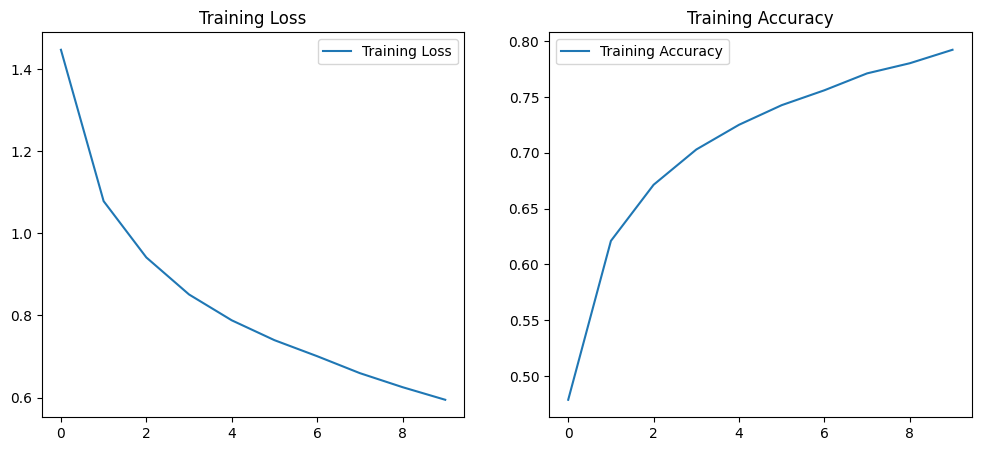

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Cross-Attention Model
class CrossAttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CrossAttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Cross-attention layer
        self.cross_attn = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        # Flatten and transpose for cross-attention
        x = x.view(x.size(0), -1, 64).transpose(0, 1)
        attn_output, _ = self.cross_attn(x, x, x)
        x = attn_output.transpose(0, 1).contiguous().view(x.size(1), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CrossAttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

Causal Attention

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.3966997682743365, Accuracy: 0.5008
Epoch 2, Loss: 1.0668870429401203, Accuracy: 0.62386
Epoch 3, Loss: 0.9669093106256421, Accuracy: 0.66018
Epoch 4, Loss: 0.9028147925501284, Accuracy: 0.68348
Epoch 5, Loss: 0.8533293312925208, Accuracy: 0.70396
Epoch 6, Loss: 0.8204418852963411, Accuracy: 0.7149
Epoch 7, Loss: 0.7837299803638702, Accuracy: 0.72756
Epoch 8, Loss: 0.7575159547731395, Accuracy: 0.7354
Epoch 9, Loss: 0.7382098676832131, Accuracy: 0.74488
Epoch 10, Loss: 0.7148826361998267, Accuracy: 0.75222


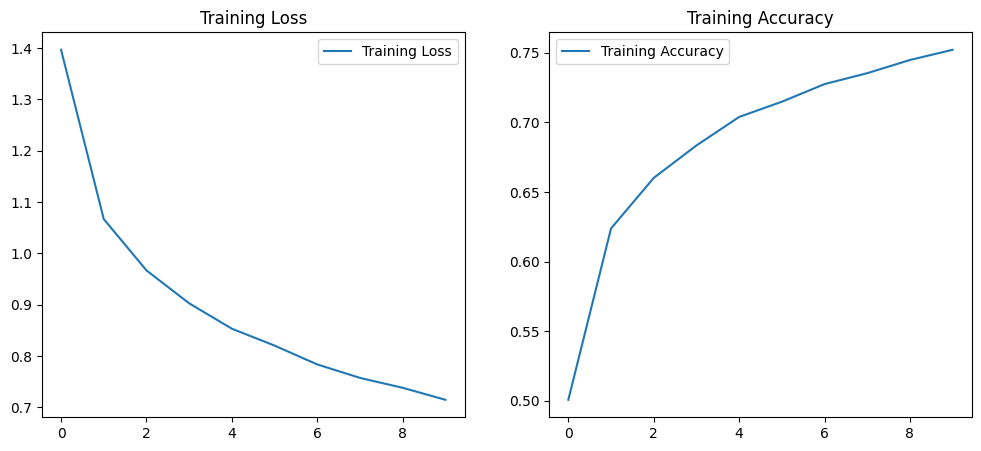

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Attention Model
class AttentionModel(nn.Module):
    def __init__(self, num_classes=10):
        super(AttentionModel, self).__init__()
        # Define the layers here
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        # Attention layer
        self.attention = nn.MultiheadAttention(embed_dim=64, num_heads=4)
        self.fc = nn.Linear(64*8*8, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1, 64)
        attn_output, _ = self.attention(x, x, x)
        x = attn_output.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Load CIFAR-10 data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = AttentionModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}, Accuracy: {correct / total}')

# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()